# Traitement du signal 
## TP Convolution and filtering signals with Python



# 1. Convolution


## 1.1. Convolution programmation

###  Importation des bibliothèques ou modules

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image

### Write and execute the following script

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0.  0.  1.  0.8 0.6 0.4 0.2 0.  0.  0.  0. ]


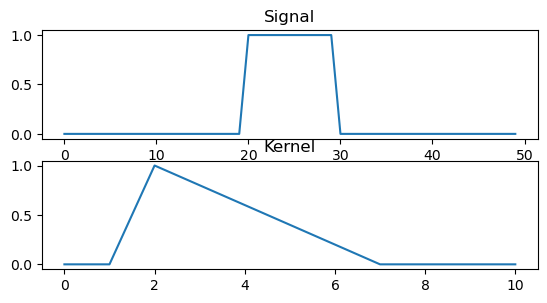

In [20]:
# length of signal
m = 50
# length of kernel
n = 11
signal = np.zeros (m)
signal[range(int(m*.4),int(m*.6))] = 1
print(signal)
kernel = np.zeros(n)
kernel[range(int(n*.25),int(n*.8))] = np.linspace(1,0,int(n*.55))
print(kernel)
# plot signal
plt.subplot2grid((3,1),(0,0))
plt.plot(signal)
plt.title('Signal')
# plot kernel
plt.subplot2grid((3,1),(1,0))
plt.plot(kernel)
plt.title('Kernel')
plt.savefig('signal-result.png', dpi=300, bbox_inches='tight')


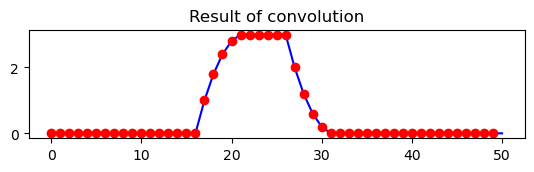

In [24]:
# setup convolution parameters
nConv = m+n-1
halfk = np.floor(n/2)
# convolution as point-wise multiplication of spectra and inverse
mx = scipy.fftpack.fft(signal,nConv)
nx = scipy.fftpack.fft(kernel,nConv)
# here's the convolution:
convres = np.real( scipy.fftpack.ifft( np.multiply(mx,nx) ) )
# chop off the 'wings' of convolution
convres = convres[range(int(halfk),int(len(convres)-halfk+1))]
# plot the result of convolution
plt.subplot2grid((3,1),(2,0))
plt.plot(convres,'b')
plt.title('Result of convolution')
# for comparison, plot against the Python convolution function
plt.plot(np.convolve(signal,kernel,mode='same'),'ro')
plt.savefig('convolution_result.png', dpi=300, bbox_inches='tight')
plt.show()


## 1.2. Signal filtering for neurological disorder analysis


#### B/ Time domain


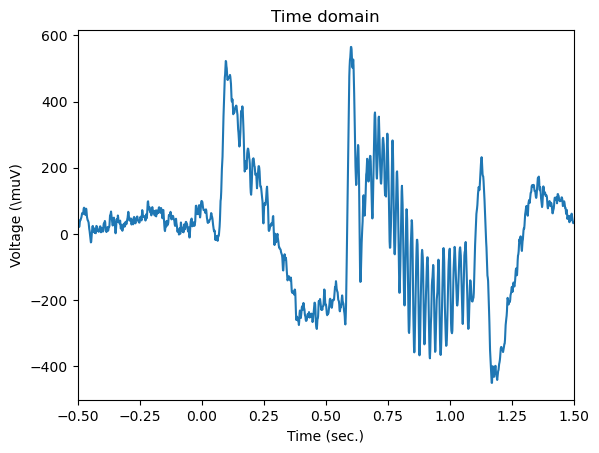

<Figure size 640x480 with 0 Axes>

In [36]:
#Extract data from mat file
matdata = scipy.io.loadmat('braindata')
timevec = matdata['timevec']
timevec = timevec[0]
srate = matdata['srate']
srate = srate[0]
braindata = matdata['braindata']
braindata = braindata[0]
n = len(timevec)
# Plot time-domain signal
plt.plot(timevec,braindata)
plt.xlim([-.5,1.5])
plt.xlabel('Time (sec.)')
plt.ylabel(r'Voltage (\muV)')
plt.title('Time domain')
plt.show()
plt.savefig('resulttime.png')


### C/ Frequency domain


** Créer le signal chronologique dit ‘time series’**

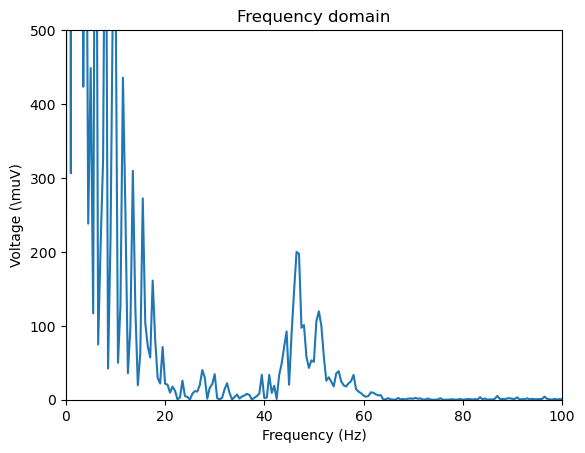

<Figure size 640x480 with 0 Axes>

In [40]:
# Compute power spectrum
dataX = scipy.fftpack.fft(braindata)/n
ampspect = 2*np.abs(dataX)**2
hz = np.linspace(0,srate,n) # out to srate as trick for the
filter
# Plot power spectrum
plt.plot(hz,ampspect[0:len(hz)])
plt.xlim([0,100])
plt.ylim([0,500])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Voltage (\muV)')
plt.title('Frequency domain')
plt.show()
plt.savefig('power_spectrum.png', dpi=300, bbox_inches='tight')  # Save the plot as a PNG file


## D/ Signal filtering between 2 and 47 Hz


datax [-0.53867877 +0.j        5.5057135 -50.026226j  0.23425755-12.376148j ...
 51.229424  -46.059185j  0.23425755+12.376148j  5.5057135 +50.026226j]
1527
datax [-0.53867877 +0.j        5.5057135 -50.026226j  0.23425755-12.376148j ...
 51.229424  -46.059185j  0.23425755+12.376148j  5.5057135 +50.026226j]
1527


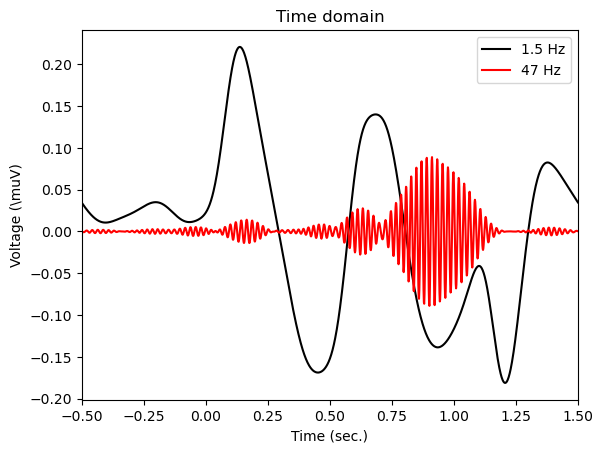

In [42]:
# Specify which frequencies to filter
peakFiltFreqs = [1.5,47] # Hz
c = 'kr' # line colors
# Loop over frequencies
leglab = []  # List for legend labels

for fi in range(0,len(peakFiltFreqs)):

 # construct the filter
 x = hz-peakFiltFreqs[fi] # shifted frequencies
 fx = np.exp(-(x/4)**2) # gaussian
 Fx = scipy.fftpack.fft(fx,nConv)
 print("datax",dataX)
 print(fx.size)

 # apply the filter to the data
 filtdat = 2*np.real( scipy.fftpack.ifft( np.multiply(dataX,fx[:,0])))

 # show the results
 plt.plot(timevec,filtdat,c[fi], label=f"{peakFiltFreqs[fi]} Hz")
 plt.xlim([-.5,1.5])
 plt.xlabel('Time (sec.)')
 plt.ylabel(r'Voltage (\muV)')
 plt.title('Time domain')
 leglab.append(f"{peakFiltFreqs[fi]} Hz")
    
plt.legend(leglab)
plt.show()



datax [-0.53867877 +0.j        5.5057135 -50.026226j  0.23425755-12.376148j ...
 51.229424  -46.059185j  0.23425755+12.376148j  5.5057135 +50.026226j]
1527
datax [-0.53867877 +0.j        5.5057135 -50.026226j  0.23425755-12.376148j ...
 51.229424  -46.059185j  0.23425755+12.376148j  5.5057135 +50.026226j]
1527


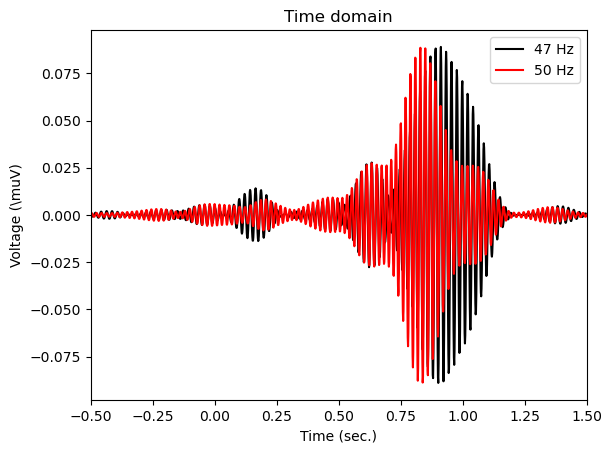

In [7]:
# Specify which frequencies to filter
peakFiltFreqs = [47, 50] # Hz
c = 'kr' # line colors
# Loop over frequencies
leglab = []  # List for legend labels

for fi in range(0,len(peakFiltFreqs)):

 # construct the filter
 x = hz-peakFiltFreqs[fi] # shifted frequencies
 fx = np.exp(-(x/4)**2) # gaussian
 Fx = scipy.fftpack.fft(fx,nConv)
 print("datax",dataX)
 print(fx.size)

 # apply the filter to the data
 filtdat = 2*np.real( scipy.fftpack.ifft( np.multiply(dataX,fx[:,0])))

 # show the results
 plt.plot(timevec,filtdat,c[fi], label=f"{peakFiltFreqs[fi]} Hz")
 plt.xlim([-.5,1.5])
 plt.xlabel('Time (sec.)')
 plt.ylabel(r'Voltage (\muV)')
 plt.title('Time domain')
 leglab.append(f"{peakFiltFreqs[fi]} Hz")
    
plt.legend(leglab)
plt.show()



### D/ Transformée de Fourier